## Scatter plot with marginal histograms

In this activity, we will make use of GridSpec to visualize a scatter plot with marginal histograms.

In [ ]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# importing the necessary dependencies
# data uploading

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':"1dhhf5agH-zJ-4oL6TEnVduhQx4yjmgQE"})   # replace the id with id of file you want to access
downloaded.GetContentFile('anage_data.csv')  

In [ ]:
# Load dataset
data = pd.read_csv('anage_data.csv')

The given dataset is not complete. Filter the data so you end up with samples containing a body mass and a maximum longevity. Select all samples of the class Aves and with a body mass smaller than 20,000.

In [ ]:
# Preprocessing
longevity = 'Maximum longevity (yrs)'
mass = 'Body mass (g)'
data = data[np.isfinite(data[longevity]) & np.isfinite(data[mass])]
# Sort according to class
aves = data[data['Class'] == 'Aves']
aves = data[data[mass] < 20000]

Create a figure with constrained layout. Create a gridspec of size 4x4. Create a scatter plot of size 3x3 and marginal histograms of size 1x3 and 3x1. Add labels and a figure title.

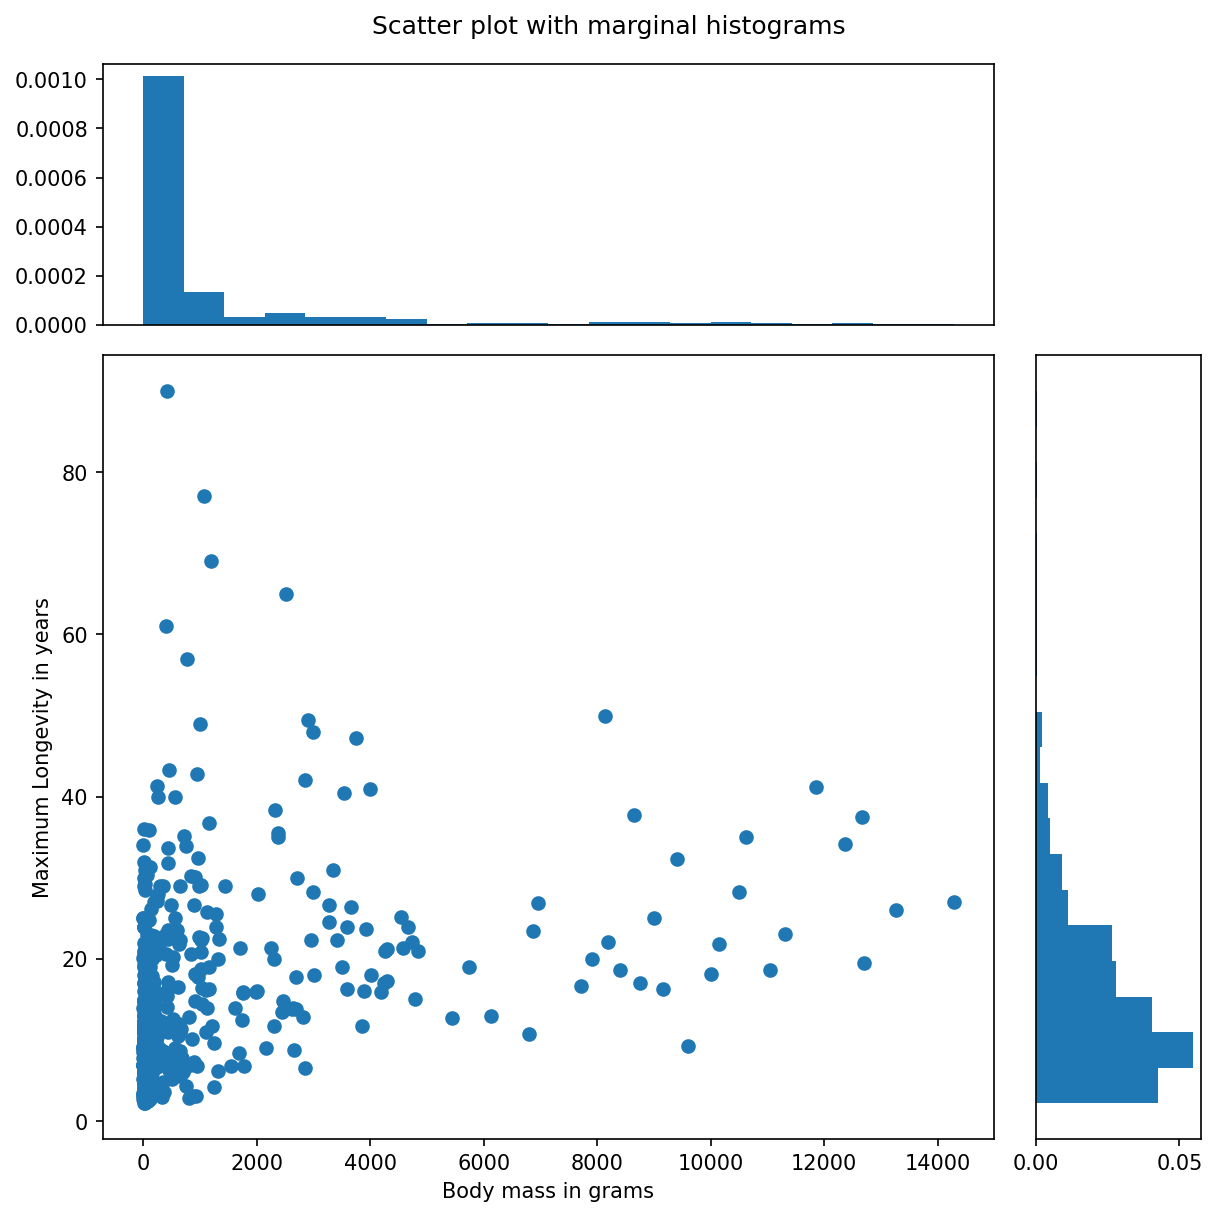

In [ ]:
# Create figure
fig = plt.figure(figsize=(8, 8), dpi=150, constrained_layout=True)
# Create gridspec
gs = fig.add_gridspec(4, 4)
# Specify subplots
histx_ax = fig.add_subplot(gs[0, :-1])
histy_ax = fig.add_subplot(gs[1:, -1])
scatter_ax =fig.add_subplot(gs[1:, :-1])

# Create plots

scatter_ax.scatter(aves[mass], aves[longevity])
histx_ax.hist(aves [mass], bins=20, density=True)
histx_ax.set_xticks([])
histy_ax.hist(aves [longevity], bins= 20, density=True, orientation='horizontal')
histy_ax.set_yticks([]) 

 

# Add labels and title
plt.xlabel('Body mass in grams') 
plt.ylabel('Maximum Longevity in years')
fig.suptitle('Scatter plot with marginal histograms')

# Show plot
plt.show()